In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
app = pd.read_csv("Assignment_Data/appearances.csv")
club_games = pd.read_csv("Assignment_Data/club_games.csv")
clubs = pd.read_csv("Assignment_Data/clubs.csv")
competitions = pd.read_csv("Assignment_Data/competitions.csv")
game_events = pd.read_csv("Assignment_Data/game_events.csv")
game_lineaps = pd.read_csv("Assignment_Data/game_lineups.csv")
games = pd.read_csv("Assignment_Data/games.csv")
player_valutations = pd.read_csv("Assignment_Data/player_valuations.csv")
players = pd.read_csv("Assignment_Data/players.csv")

H3 percentuale di vittoria

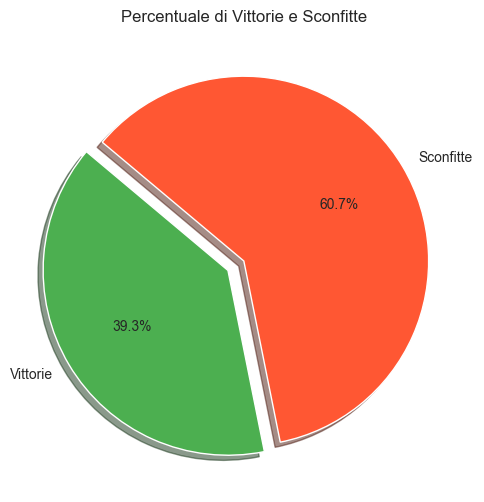

In [3]:
df=pd.read_csv("Assignment_Data/club_games.csv")
df.head()
total_wins=df['is_win'].sum()
total_loss=len(df)-total_wins
labels = ['Vittorie', 'Sconfitte']
sizes = [total_wins, total_loss]
colors = ['#4CAF50', '#FF5733']
explode = (0.1, 0)  # "esplodere" la fetta delle vittorie
# Creare il grafico a torta
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentuale di Vittorie e Sconfitte')
plt.show()
#TODO per una sq specifica 

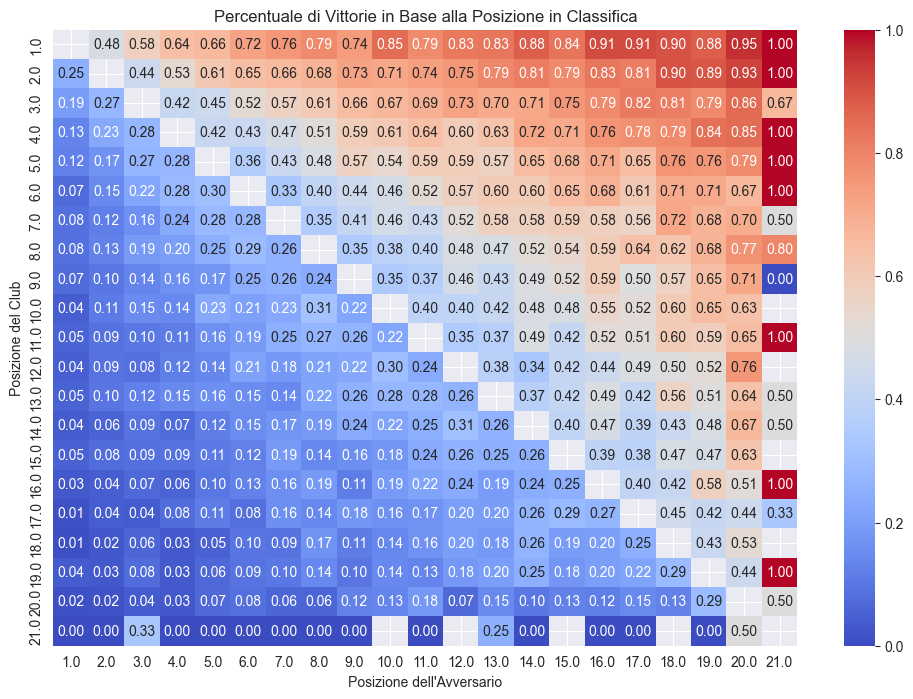

In [19]:
df['win'] = df['is_win'].astype(int)
pivot_table = df.pivot_table(values='win', index='own_position', columns='opponent_position', aggfunc='mean')
# Creare la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Percentuale di Vittorie in Base alla Posizione in Classifica')
plt.xlabel('Posizione dell\'Avversario')
plt.ylabel('Posizione del Club')
plt.show()

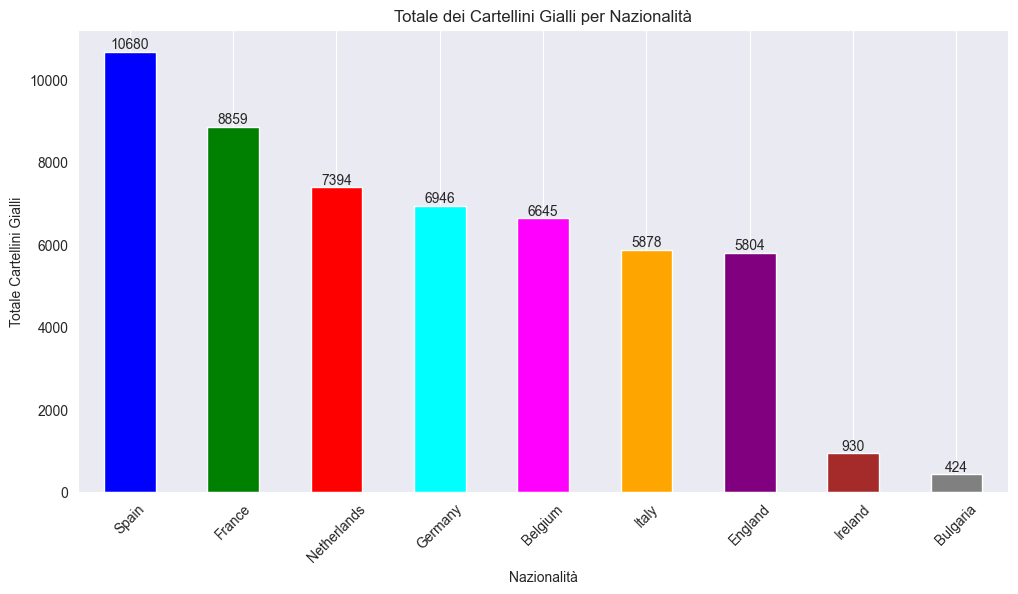

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

app = pd.read_csv("Assignment_Data/appearances.csv")
players = pd.read_csv("Assignment_Data/players.csv")

nationalities = ["Italy", "France", "England", "Germany", "Spain", "Bulgaria", "Ireland", "Netherlands", "Belgium"]
filtered_players = players[players["country_of_birth"].isin(nationalities)]

top_players = filtered_players.groupby("country_of_birth").head(1000)

merged_df = pd.merge(top_players, app, on="player_id")

yellow_cards_by_nation = merged_df.groupby("country_of_birth")["yellow_cards"].sum()

yellow_cards_by_nation = yellow_cards_by_nation.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax =yellow_cards_by_nation.plot(kind="bar", color=['blue', 'green', 'red', 'cyan', 'magenta', 'orange', 'purple', 'brown', 'grey'])
for i in ax.containers:
    ax.bar_label(i, label_type="edge")
plt.xlabel("Nazionalità")
plt.ylabel("Totale Cartellini Gialli")
plt.title("Totale dei Cartellini Gialli per Nazionalità")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


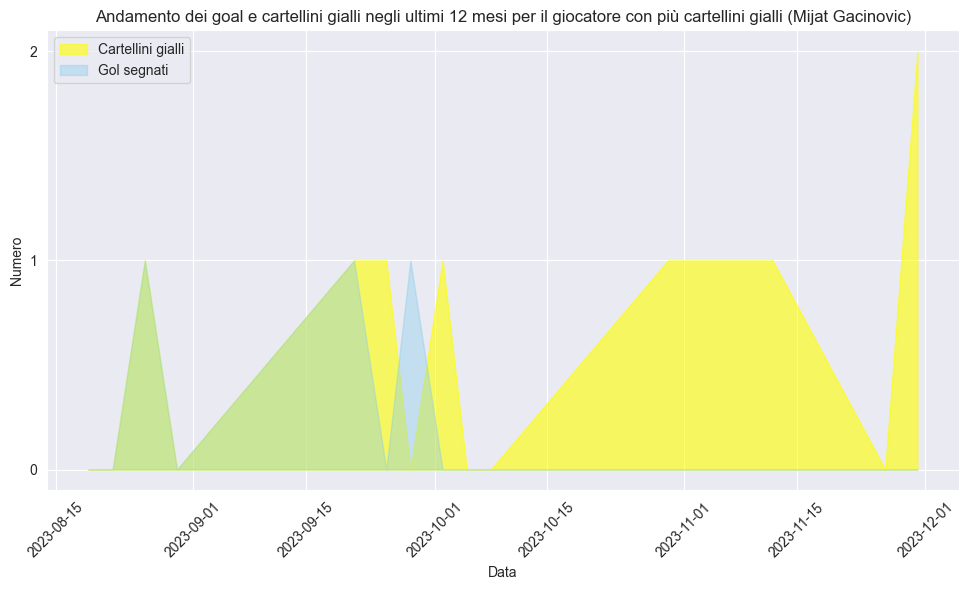

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from datetime import datetime, timedelta

appearances = pd.read_csv("Assignment_Data/appearances.csv")
players = pd.read_csv("Assignment_Data/players.csv")

one_year_ago = datetime.now() - timedelta(days=365)

appearances_last_year = appearances[pd.to_datetime(appearances['date']) >= one_year_ago]

player_yellow_cards = appearances_last_year.groupby('player_id')['yellow_cards'].sum().reset_index()
player_most_yellow_cards_id = player_yellow_cards.loc[player_yellow_cards['yellow_cards'].idxmax()]['player_id']

player_appearances = appearances_last_year[appearances_last_year['player_id'] == player_most_yellow_cards_id]

player_performance = player_appearances[['date', 'goals', 'yellow_cards']].copy()

player_performance['date'] = pd.to_datetime(player_performance['date'])

player_performance.sort_values(by='date', inplace=True)

plt.figure(figsize=(10, 6))

plt.fill_between(player_performance['date'], player_performance['yellow_cards'], color='yellow', alpha=0.6, label='Cartellini gialli')

plt.fill_between(player_performance['date'], player_performance['goals'], color='skyblue', alpha=0.4, label='Gol segnati')

plt.xlabel('Data')
plt.ylabel('Numero')
plt.title(f'Andamento dei goal e cartellini gialli negli ultimi 12 mesi per il giocatore con più cartellini gialli ({players[players["player_id"] == player_most_yellow_cards_id]["name"].values[0]})')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)


plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()


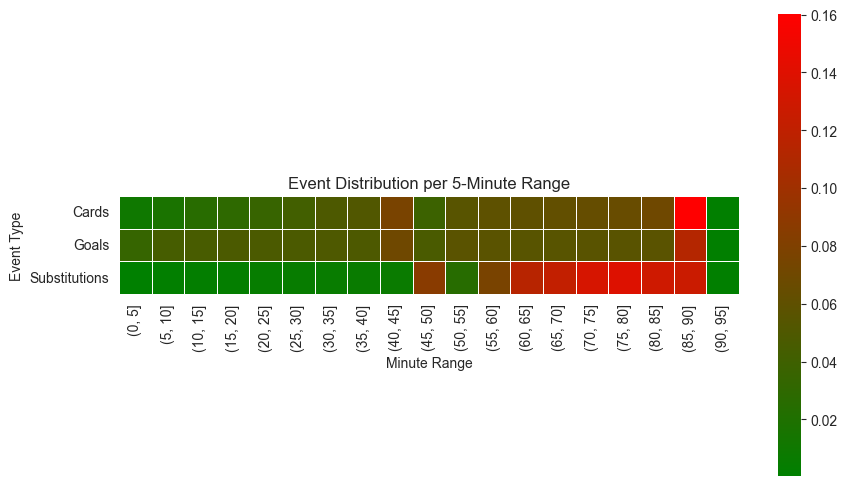

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Load the game events data
game_events = pd.read_csv("Assignment_Data/game_events.csv")

# Filter to only include specified event types
event_types = ['Goals', 'Cards', 'Substitutions']
game_events = game_events[game_events['type'].isin(event_types)]

# Create a new column for the 5-minute range, starting from 0
game_events['minute_range'] = pd.cut(game_events['minute'], range(0, 96, 5))

# Create a pivot table with 'type' as columns, 'minute_range' as index and event count as values
pivot_table = game_events.pivot_table(values='game_event_id', index='minute_range', columns='type', aggfunc='count', fill_value=0, observed=False)

# Calculate the total number of each event type
total_events = game_events['type'].value_counts()

# Divide the count of each event type in each 5-minute range by the total number of that event type
pivot_table = pivot_table.divide(total_events, axis='columns')

# Transpose the pivot table to swap the x and y-axis
pivot_table = pivot_table.transpose()

# Define a custom colormap with green to yellow gradient
colors = ["green", "red"]
cmap = LinearSegmentedColormap.from_list("CustomGreenRed", colors)

# Create a heatmap with square cells and the custom color palette (green to yellow gradient)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap=cmap, linewidths=0.5, square=True)
plt.title('Event Distribution per 5-Minute Range')
plt.xlabel('Minute Range')
plt.ylabel('Event Type')
plt.show()


In [40]:
from geopandas.tools import geocode

fouls = game_events[game_events['type'] == 'foul']

fouls_with_location = fouls.merge(players, left_on='player_id', right_on='player_id')

geocoded_cities = geocode(fouls_with_location['city_of_birth'], provider='nominatim', user_agent="myGeocoder")
fouls_with_location = fouls_with_location.join(geocoded_cities.set_index('address'), on='city_of_birth')

gdf_fouls = gpd.GeoDataFrame(fouls_with_location, geometry='geometry')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

europe = world[(world.continent == "Europe")]

gdf_fouls_in_europe = gdf_fouls[gdf_fouls.geometry.within(europe.unary_union)]

fig, ax = plt.subplots(figsize=(15, 10))
europe.plot(ax=ax, color='lightgrey')

foul_counts = gdf_fouls_in_europe.groupby('geometry').size().reset_index(name='counts')

gdf_foul_counts = gpd.GeoDataFrame(foul_counts, geometry='geometry')

gdf_foul_counts.plot(ax=ax, column='counts', cmap='Reds', markersize=gdf_foul_counts['counts'] * 10, legend=True)

plt.title('Zone europee con il maggior numero di falli')
plt.show()


ValueError: Assigning CRS to a GeoDataFrame without a geometry column is not supported. Supply geometry using the 'geometry=' keyword argument, or by providing a DataFrame with column name 'geometry'

In [ ]:
def calculate_age(birthdate):
    if pd.isna(birthdate):
        return None
    birthdate = datetime.strptime(str(birthdate), '%Y-%m-%d')
    today = datetime.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

players['age'] = players['date_of_birth'].apply(calculate_age)

players_cleaned = players.dropna(subset=['age', 'market_value_in_eur'])

# Grafico a dispersione dell'età contro il valore di mercato
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='market_value_in_eur', data=players_cleaned)
plt.title('Relazione tra età e valore di mercato dei giocatori')
plt.xlabel('Età')
plt.ylabel('Valore di mercato (in EUR)')
plt.ticklabel_format(style='plain', axis='y')  # Disabilita la notazione scientifica
plt.show()